In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.figsize'] = [12, 8]

### Задание.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

In [ ]:
from scipy.stats import norm

In [ ]:
N = 10_000
X = norm.rvs(size=N)

$X_1, ..., X_N$ - случайные величины с ф-ей распределения $\Phi$. Для каждого числа $x$, пусть $R_n(x)$ считает как много из $X_1, ..., X_n$ меньше или равны $x$; то есть,
$$R_n(x) = \sum_{j=1}^{n} I(X_j \le x)$$
Т.к. индикаторы $I(X_j \le x)$ н.о.р.   с вероятностью успеха $\Phi(x)$, мы знаем, что $R_n(x) \sim \mathrm{Bin}(n, \Phi(x))$.

Эмпирическая ф-ия распределения $X_1, ..., X_n$ определяется как
$$\hat{F}_n(x) = \frac{R_n(x)}{n}$$

In [ ]:
def sample_cdfs(X):
  """
  Возвращает эмпирическую ф-ию распределения для первых n элементов выборки, для всех n <= N.
        
      Input:
            X (numpy.ndarray): выборка из стандартного нормального рапределения.
      Return:
            res (list): список кортежей, каждый кортеж сопоставляет значения x и y = P(X <= x) для одного n.
  """
  res = [] 
  for n in range(1, len(X)+1):
    x, y = np.sort(X[:n]), np.arange(1, n+1) / n
    res.append((x, y))
  return res

In [ ]:
cdfs = sample_cdfs(X)

Для $n \in \{10, 25, 50, 100, 1000, N\}$ построим графики эмпирической функции
распределения c помощью `ax.step` с параметром `where='post'` (значение параметра должно быть согласовано с реализацией `sample_cdfs(X)`). Дополнительно каждая из подвыборок нанесена на ось абсцисс. 

In [ ]:
def clt_visualization(cdfs, n):
  """
  Строит в одних осях эмпирическую и истинную ф-ии распределения (стандартного нормального).
      
      Input:
          n (int): размер подвыборки.
          cdfs (list): список кортежей, каждый кортеж сопоставляет значения x и y = P(X <= x) для одного n.
      Output:
          Эмпирическая и истинная ф-ии распределения для подвыборки размера n, подвыборка.
  """
  x, y = cdfs[n-1][0], cdfs[n-1][1]

  fig, ax = plt.subplots()

  # Построение выборочной функции распределения
  ax.step(x, y, where='post', c='grey', lw=2, alpha=0.8, label='sample_cdf')

  # Построение истинной функции распределения
  grid = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
  ax.plot(grid, norm.cdf(grid), 'r-', lw=4, alpha=0.2, label='true_cdf')

  # Нанесение подвыборки на ось абсцисс 
  plt.scatter(x, np.zeros(n)-0.04, c='grey', alpha=0.2)

  ax.set_title(f'Standart normal CDFs for n = {n}')
  ax.legend()

  plt.show()

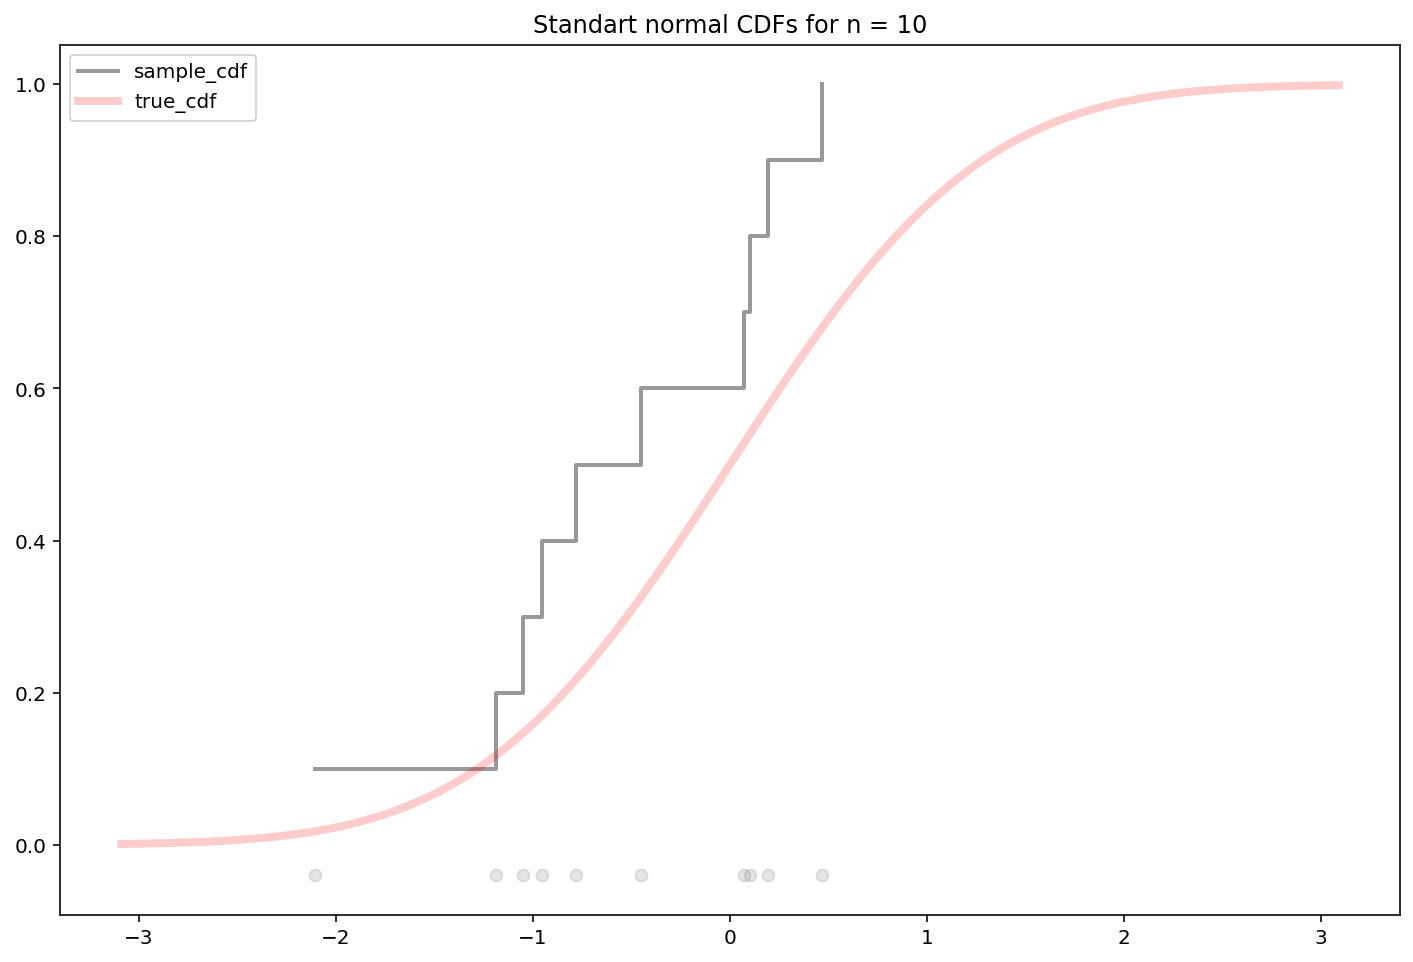

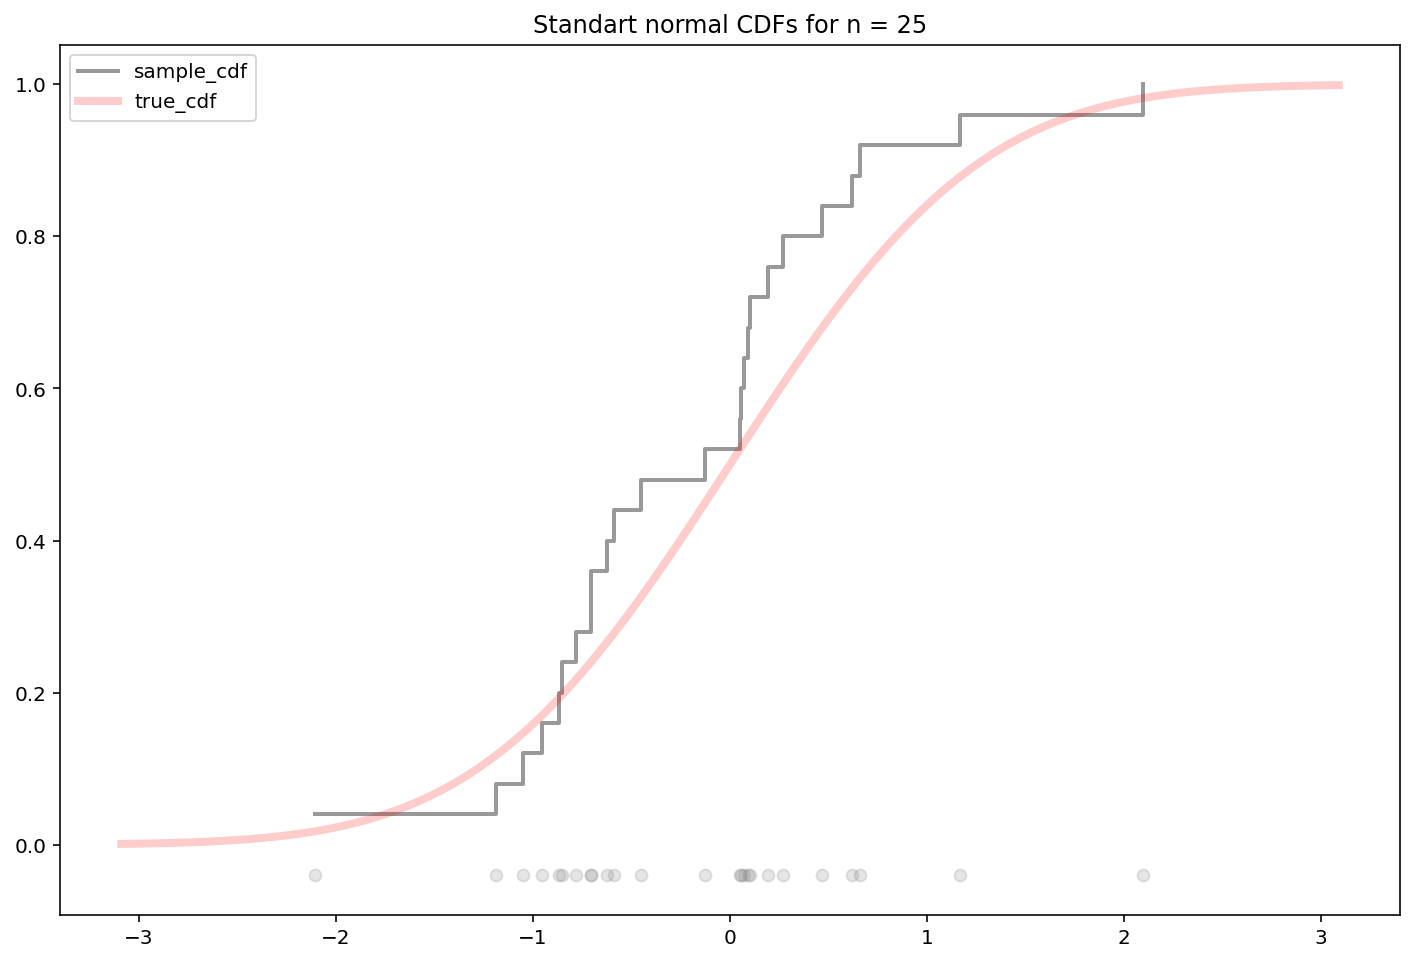

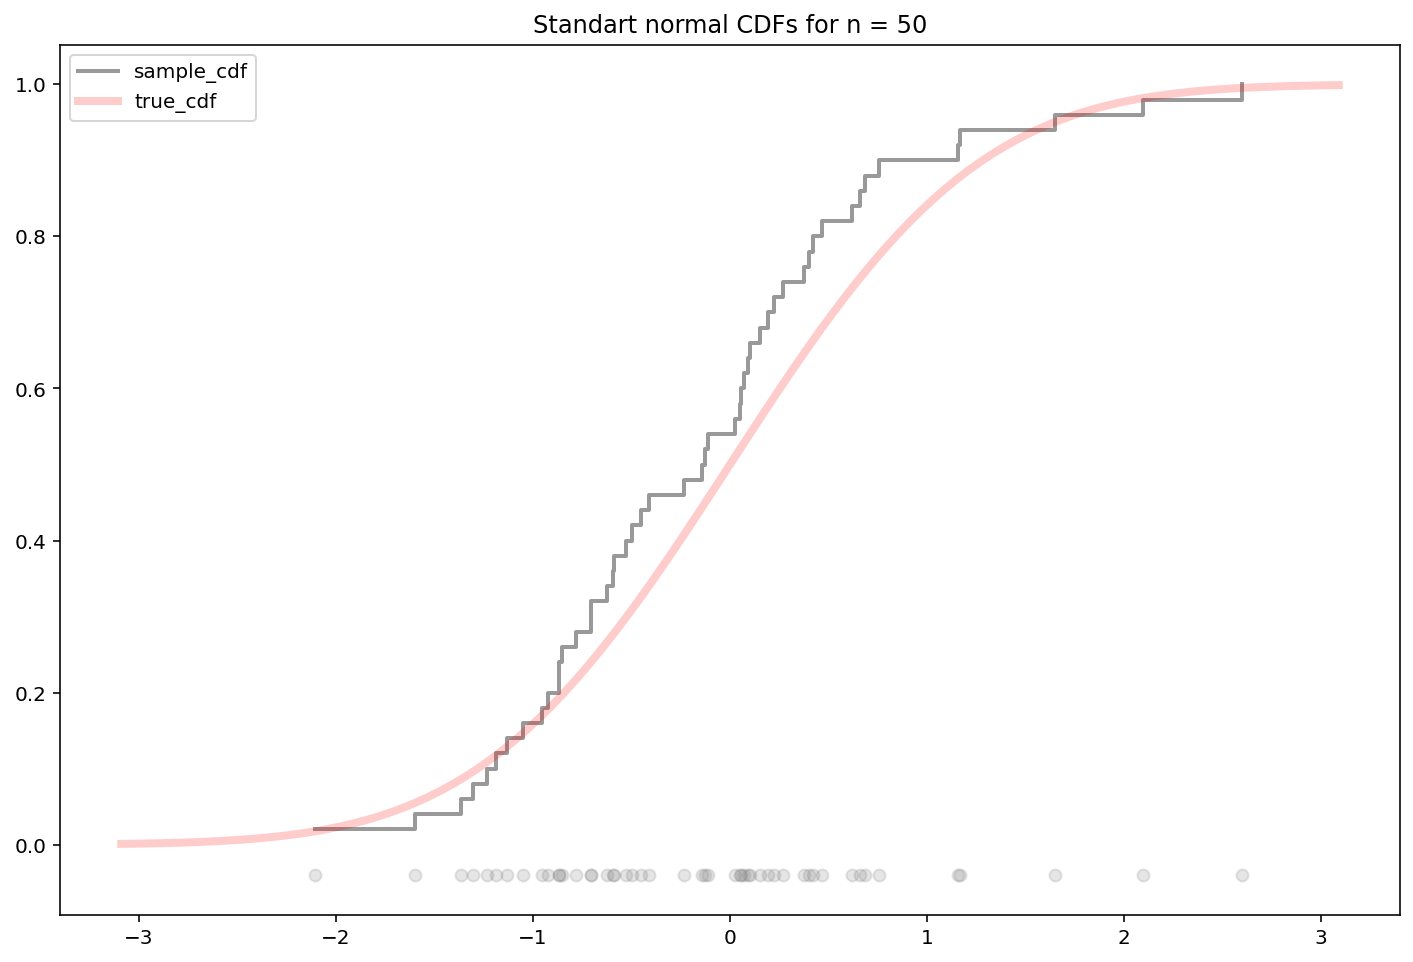

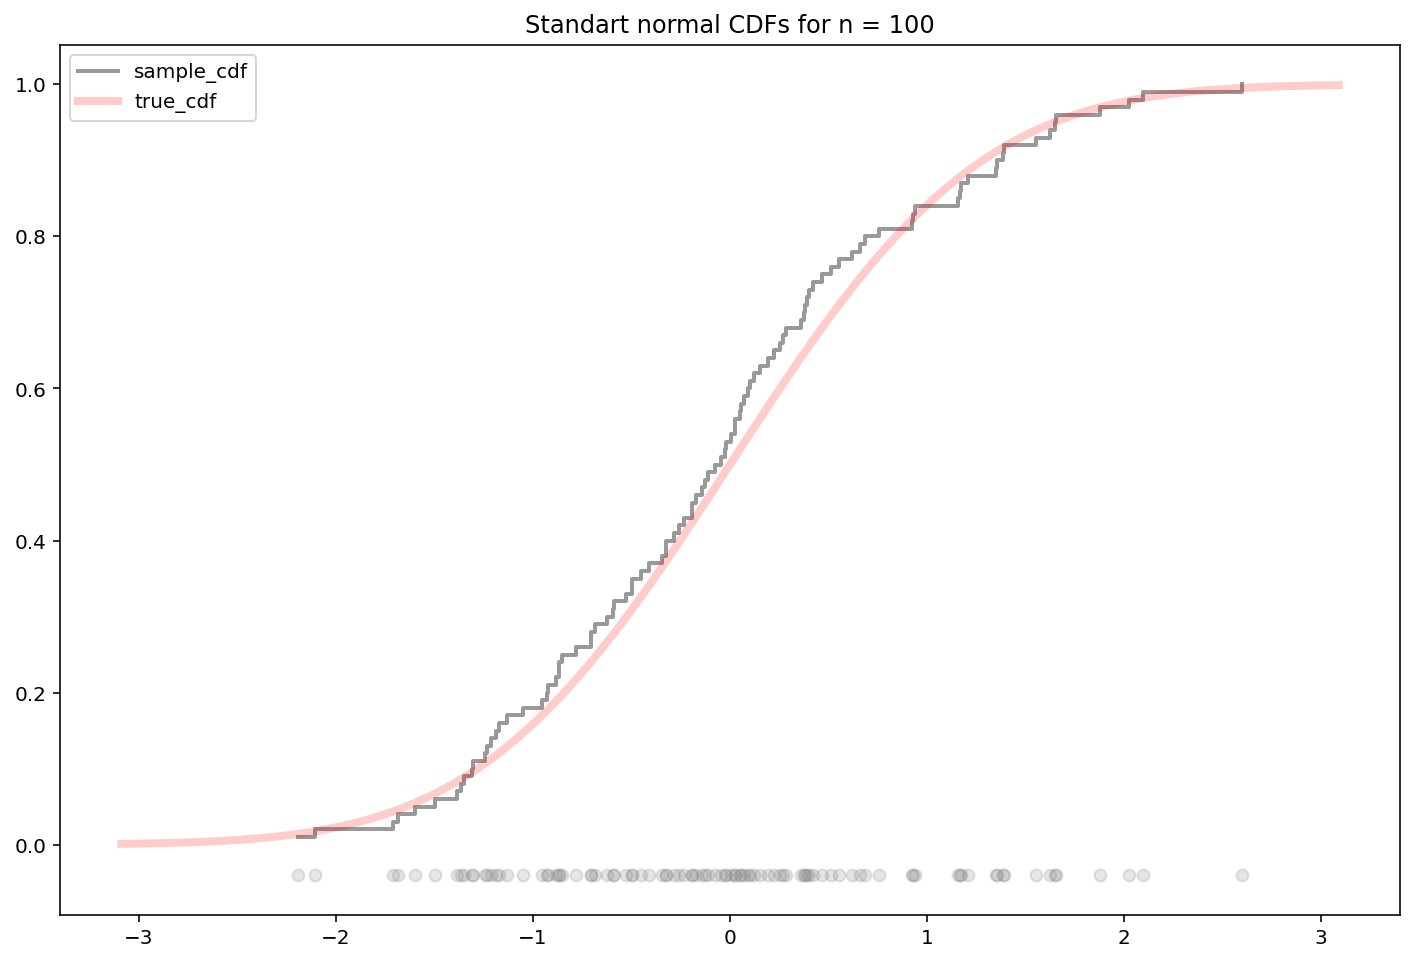

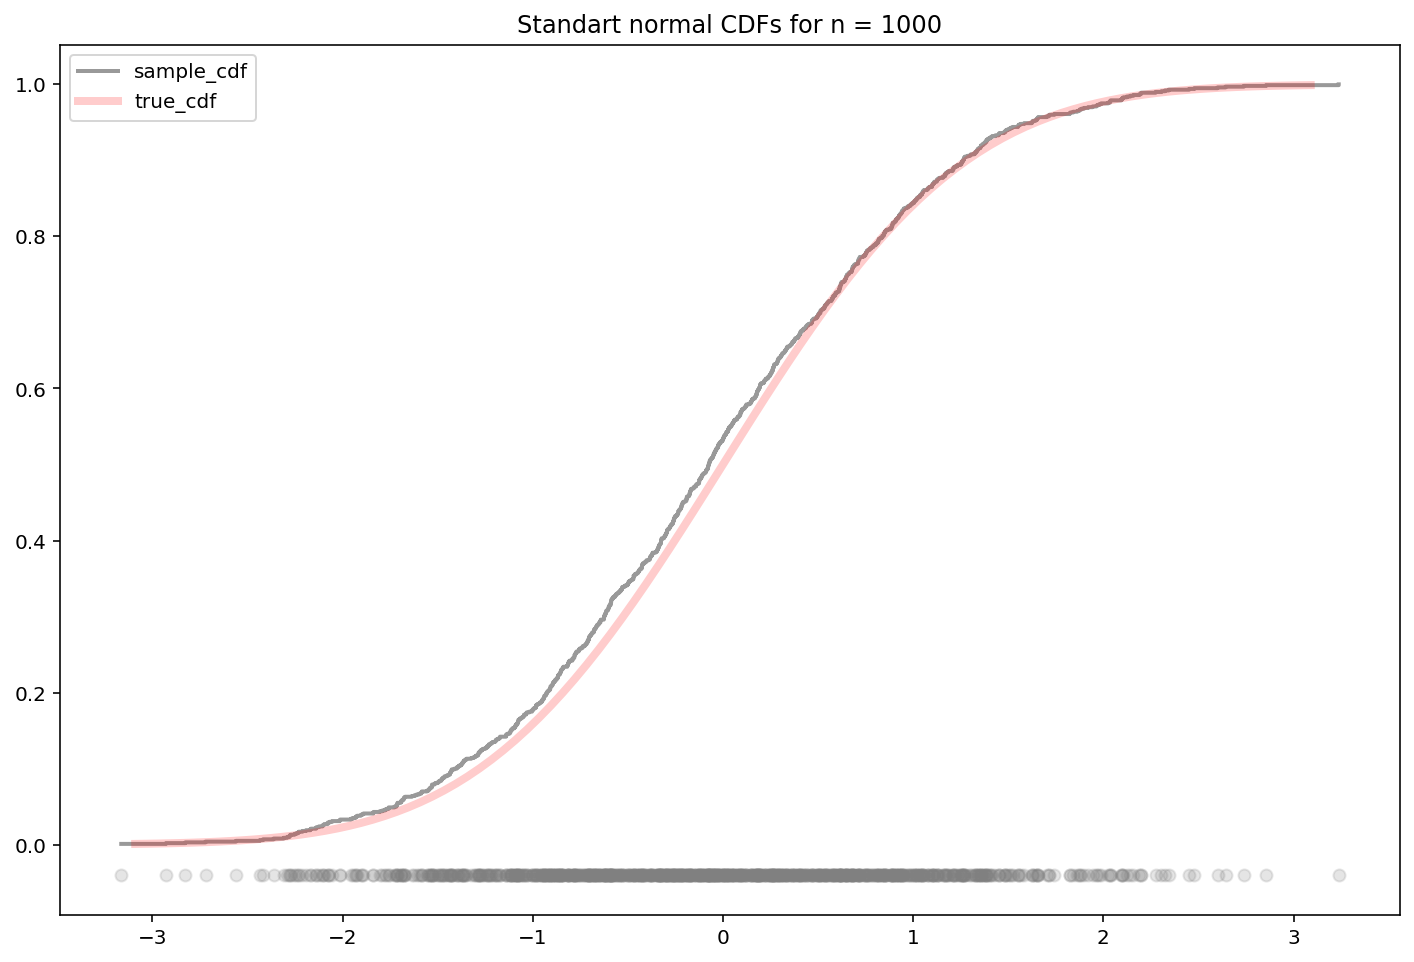

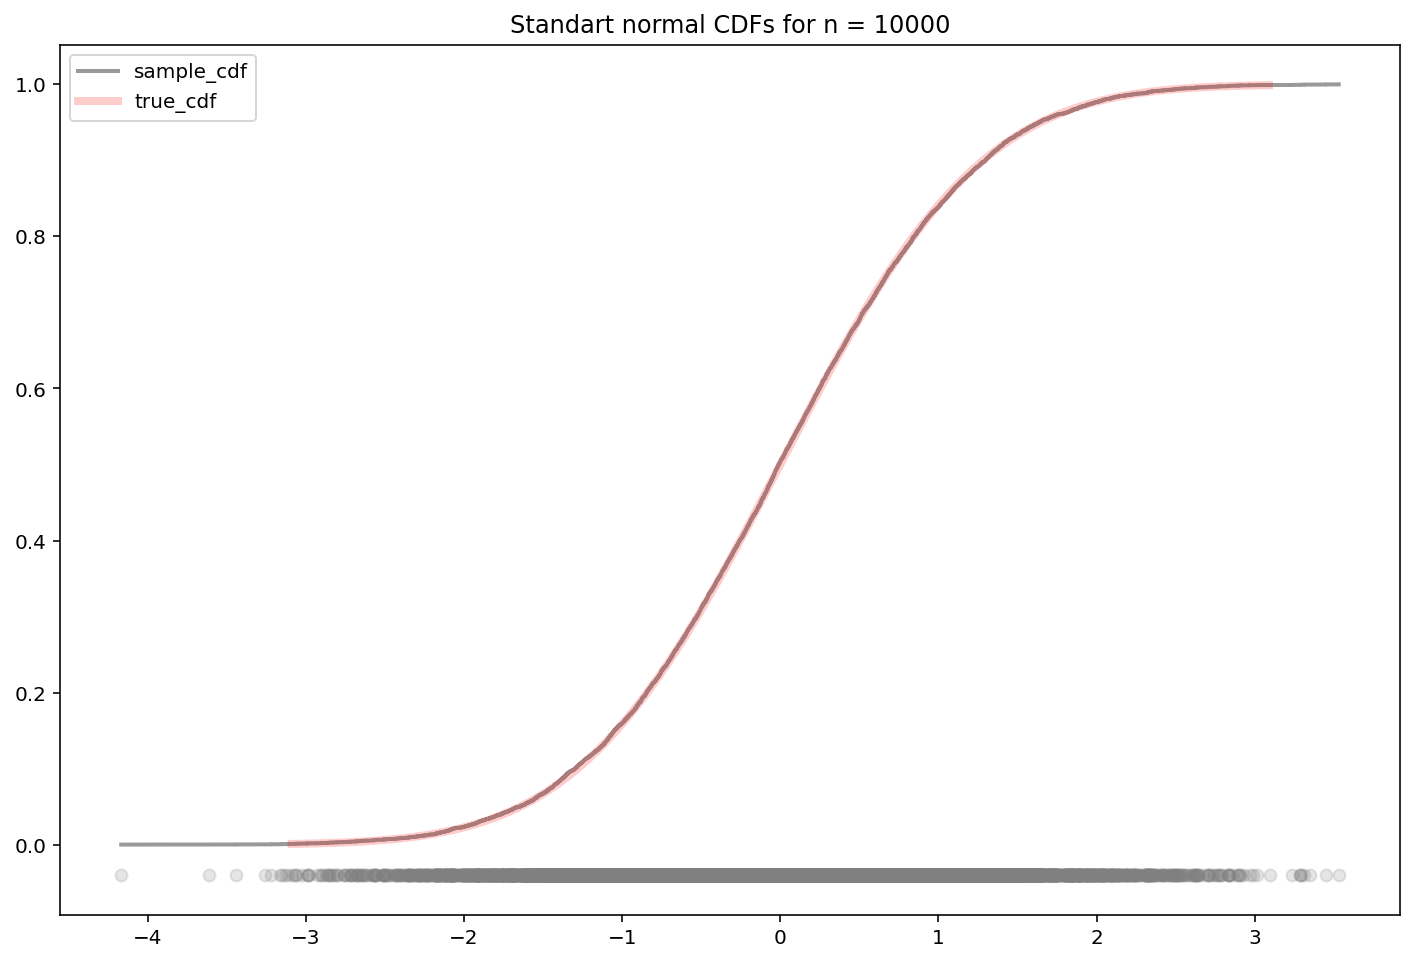

In [ ]:
for n in [10, 25, 50, 100, 1000, N]:
  clt_visualization(cdfs, n)

Что происходит с эмпирической ф-ей распределения в пределе? Закон больших чисел (ЗБЧ) отвечает на этот вопрос: для каждого $x$, $R_n(x)$ является суммой $n$ независимых и одинаково распредленных $\mathrm{Bern}(p)$ рандомных переменных, где $p = \Phi(x)$. Так, следуя ЗБЧ, $\hat{F}_n(x) = \frac{R_n(x)}{n}$$ \to \Phi(x)$ с вероятностью $1$, с $n \to \infty$. Этот факт демонстрируется эволюцией графиков с возрастанием $n$.